Here I will try to implement basic code for linear regression.

In [1]:
import numpy as np 
import pandas as pd
import random

In [43]:
x = np.random.rand(120,1)

In [44]:
Y = 3.22+1.73*x*x+2*x+1*np.random.uniform(1, 5, size=(120, 1))

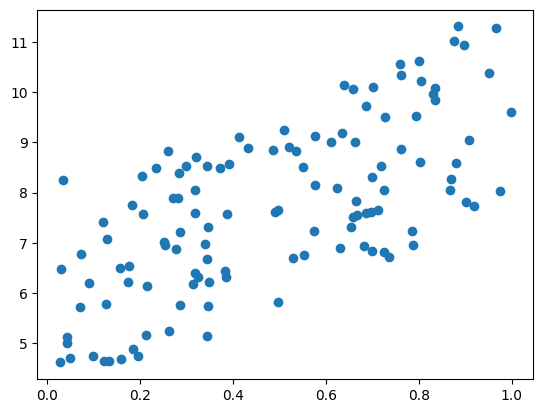

In [45]:
import matplotlib.pyplot as plt

plt.scatter(x,Y)


In [46]:
test_x = np.random.rand(120,1)
test_y = 2+2*x +np.random.uniform(1, 5, size=(120, 1))

Using normal equation

In [47]:
x_n = np.c_[np.ones((120,1)),x]

In [48]:
theta_best = np.linalg.inv(x_n.T.dot(x_n)).dot(x_n.T).dot(Y)

In [49]:
theta_best

array([[5.71961857],
       [4.10735272]])

Using Gradient Descents:
>Batch Gradient Descent

In [50]:
theta

array([[-0.52504876, -0.87818591, -1.15395065, -1.49614707,  0.58520546,
         1.31536963,  0.77594571,  0.57385308, -0.09411574,  1.11369428],
       [-0.46654879,  1.05089796, -1.3942686 ,  0.48555216, -1.39064964,
        -0.17986044,  0.34704816, -1.0450523 , -0.76958112,  0.98705769]])

In [51]:
theta_best

array([[5.71961857],
       [4.10735272]])

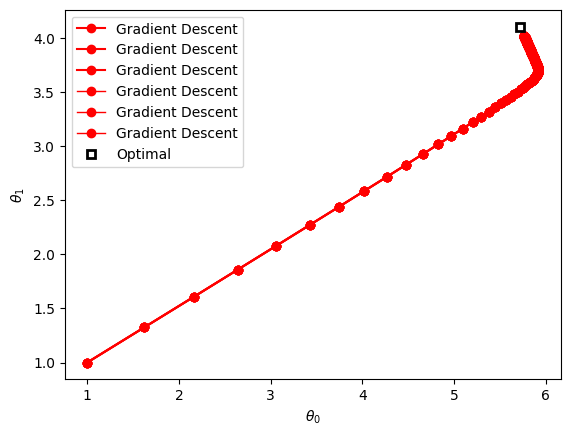

In [52]:
theta = np.ones((2,3))
eta = 00.05
n_epochs = 300
m = 120
rec=[]
indices = np.random.permutation(m)
x_n= x_n[indices]
Y = Y[indices]
for i in range(n_epochs):
    rec.append(theta)
    grads = 2/m*x_n.T.dot(x_n.dot(theta) - Y)
    theta  = theta - eta*grads
    
    
theta_path_bgd = rec
# Force every element into a simple (2,) shape
theta_path_bgd = np.array([np.squeeze(t) for t in theta_path_bgd])

# Now the plot will work
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "r-o", label="Gradient Descent")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "r-o", linewidth=1, label="Gradient Descent")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$")
plt.plot(theta_best[0], theta_best[1],
         "ws",
         markeredgecolor="black",
         markeredgewidth=2,
         label="Optimal") # Your theta_best values
plt.legend()
plt.show()

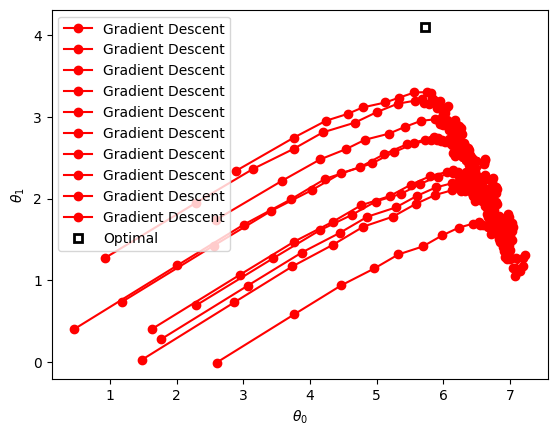

In [53]:
m = len(Y)
X_b = np.c_[np.ones((m, 1)), x]
theta = np.random.randn(2,10) # Random initialization
epochs = 10
batch_size = 32
learning_rate =0.1
rec = []   
for epoch in range(epochs):
        # 1. Shuffle the data at the start of each epoch
        indices = np.random.permutation(m)
        X_b_shuffled = X_b[indices]
        y_shuffled = Y[indices]
        
        for i in range(0, m, batch_size):
            # 2. Grab the mini-batch
            xi = X_b_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            
            # 3. Compute gradients for the batch
            gradients = (2/len(yi)) * xi.T.dot(xi.dot(theta) - yi)
            
            # 4. Update
            theta = theta - learning_rate * gradients
            rec.append(theta)
theta_path_bgd = rec
# Force every element into a simple (2,) shape
theta_path_bgd = np.array([np.squeeze(t) for t in theta_path_bgd])

# Now the plot will work
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "r-o", label="Gradient Descent")

plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$")
plt.plot(theta_best[0], theta_best[1],
         "ws",
         markeredgecolor="black",
         markeredgewidth=2,
         label="Optimal") # Your theta_best values
plt.legend()
plt.show()

(120, 1)

IRIS DATASET

In [55]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [56]:
iris = datasets.load_iris()

In [57]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  